In [1]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

In this example, we will explore statistics for two classic novels: *The Adventures of Huckleberry Finn* by Mark Twain, and *Little Women* by Louisa May Alcott. The text of any book can be read by a computer at great speed. Books published before 1923 are currently in the *public domain*, meaning that everyone has the right to copy or use the text in any way. [Project Gutenberg](http://www.gutenberg.org/) is a website that publishes public domain books online. Using Python, we can load the text of these books directly from the web.

The features of Python used in this example will be explained in detail later in the course. This example is meant to illustrate some of the broad themes of this text. Don't worry if the details of the program don't yet make sense. Instead, focus on interpreting the images generated below. The "Expressions" section later in this chapter will describe most of the features of the Python programming language used below.

First, we read the text of both books into lists of chapters, called `huck_finn_chapters` and `little_women_chapters`. In Python, a name cannot contain any spaces, and so we will of often use an underscore `_` to stand in for a space. The `=` in the lines below give a name on the left to the result of some computation described on the right. A *uniform resource locator* or *URL* is an address on the Internet for some content; in this case, the text of a book.

In [2]:
# Read two books, fast!

huck_finn_url = 'http://www.gutenberg.org/cache/epub/76/pg76.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

little_women_url = 'http://www.gutenberg.org/cache/epub/514/pg514.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

While a computer cannot understand the text of a book, we can still use it to provide us with some insight into the structure of the text. The name `huck_finn_chapters` is currently bound to a list of all the chapters in the book. We can place those chapters into a table to see how each begins.

In [3]:
Table([huck_finn_chapters], ['Chapters'])

Chapters
I. YOU don't know about me without you have read a book ...
II. WE went tiptoeing along a path amongst the trees bac ...
"III. WELL, I got a good going-over in the morning from o ..."
"IV. WELL, three or four months run along, and it was wel ..."
V. I had shut the door to. Then I turned around and ther ...
"VI. WELL, pretty soon the old man was up and around agai ..."
"VII. ""GIT up! What you 'bout?"" I opened my eyes and look ..."
VIII. THE sun was up so high when I waked that I judged ...
IX. I wanted to go and look at a place right about the m ...
X. AFTER breakfast I wanted to talk about the dead man a ...


Each chapter begins with a chapter number in Roman numerals. That is followed by the first sentence of the chapter. Project Gutenberg has printed the first word of each chapter in upper case. 

The book describes a journey that Huck and Jim take along the Mississippi River. Tom Sawyer joins them towards the end as the action heats up. We can quickly visualize how many times these characters have each been mentioned at any point in the book.

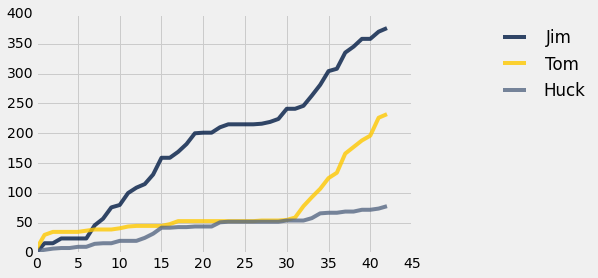

In [4]:
counts = Table([np.char.count(huck_finn_chapters, "Jim"), 
                np.char.count(huck_finn_chapters, "Tom"),
                np.char.count(huck_finn_chapters, "Huck")], 
               ["Jim", "Tom", "Huck"])
counts.cumsum().plot(overlay=True)

In the plot above, the horizontal axis shows chapter numbers and the vertical axis shows how many times each character has been mentioned so far. You can see that Jim is a central character, by the large number of times his name appears. Notice how Tom is hardly mentioned for much of the book until after Chapter 30. His curve and Jim's rise sharply at that point, as the action involving both of them intensifies. As for Huck, his name hardly appears at all, because he is the narrator. 

*Little Women* is a story of four sisters growing up together during the civil war. In this book, chapter numbers are spelled out and chapter titles are written in all capital letters.

In [5]:
Table({'Chapters': little_women_chapters})

Chapters
"ONE PLAYING PILGRIMS ""Christmas won't be Christmas witho ..."
TWO A MERRY CHRISTMAS Jo was the first to wake in the gr ...
"THREE THE LAURENCE BOY ""Jo! Jo! Where are you?"" cried Me ..."
"FOUR BURDENS ""Oh, dear, how hard it does seem to take up ..."
"FIVE BEING NEIGHBORLY ""What in the world are you going t ..."
SIX BETH FINDS THE PALACE BEAUTIFUL The big house did pr ...
"SEVEN AMY'S VALLEY OF HUMILIATION ""That boy is a perfect ..."
"EIGHT JO MEETS APOLLYON ""Girls, where are you going?"" as ..."
"NINE MEG GOES TO VANITY FAIR ""I do think it was the most ..."
"TEN THE P.C. AND P.O. As spring came on, a new set of am ..."


We can track the mentions of main characters to learn about the plot of this book as well.  The protagonist Jo interacts with her sisters Meg, Beth, and Amy regularly, up until Chapter 27 when she moves to New York alone.

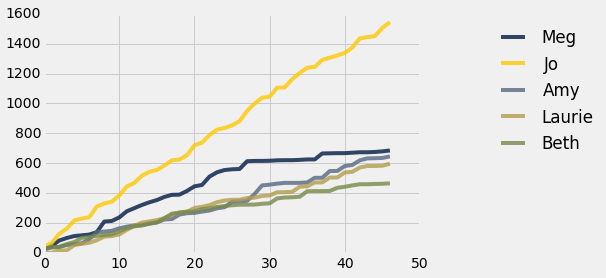

In [6]:
people = ["Meg", "Jo", "Beth", "Amy", "Laurie"]
people_counts = Table({pp: np.char.count(little_women_chapters, pp) for pp in people})
people_counts.cumsum().plot(overlay=True)

Laurie is a young man who marries one of the girls in the end. See if you can use the plots to guess which one.

Investigating data using visualizations, such as these cumulative count plots, is the central theme of Chapter 2 of this text. One of the central goals of this text is to provide you with the tools to visualize a wide range of data — numbers, text, and structures — while learning to interpret the resulting images.

Chapter 3 investigates the problem of determining whether two similar patterns are really the same or different. For example, in the context of novels, the word "character" has a second meaning: a printed symbol such as a letter or number. Below, we compare the counts of this type of character in the first chapter of Little Women.

In [7]:
from collections import Counter

chapter_one = little_women_chapters[0]
counts = Counter(chapter_one.lower())
letters = Table([counts.keys(), counts.values()], ['Letters', 'Chapter 1 Count'])
letters.sort('Letters').show(20)

Letters,Chapter 1 Count
,4102
!,28
"""",190
',125
",",423
-,21
.,189
;,4
?,16
_,6


How do these counts compare with the character counts in Chapter 2? By plotting both sets of counts in one chart, we can see slight variations for every character. Is that difference meaningful? These questions will be addressed precisely in this text.

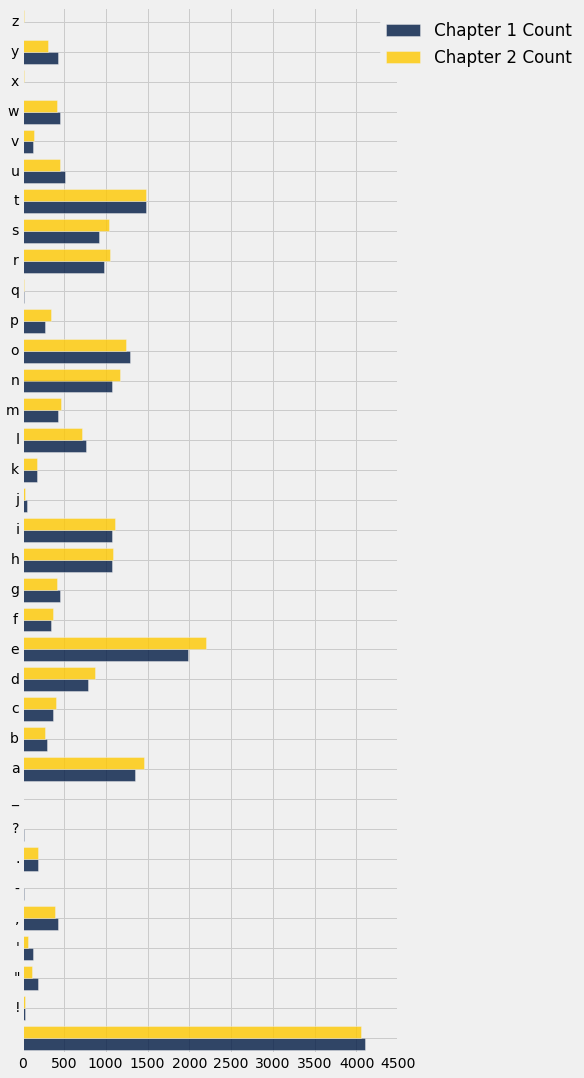

In [8]:
counts = Counter(little_women_chapters[1].lower())
two_letters = Table([counts.keys(), counts.values()], ['Letters', 'Chapter 2 Count'])
compare = letters.join('Letters', two_letters)
compare.barh('Letters', overlay=True)

In this text, we will learn to describe the relationships between quantities and use that information to make predictions. First, we will explore how to make accurate predictions based on incomplete information. Later, we will develop methods that will allow us to integrate multiple sources of uncertain information to make decisions.

As an example, let us first use the computer to get us some information that would be really tedious to acquire by hand: the number of characters and the number of periods in each chapter of both books.

In [9]:
chlen_per_hf = Table([[len(s) for s in huck_finn_chapters], 
                      np.char.count(huck_finn_chapters, '.')],
                     ["HF Chapter Length", "Number of periods"])
chlen_per_lw = Table([[len(s) for s in little_women_chapters], 
                      np.char.count(little_women_chapters, '.')],
                     ["LW Chapter Length", "Number of periods"])

Here are the data for *Huckleberry Finn*. Each row of the table below corresponds to one chapter of the novel, and displays the number of characters as well as the number of periods in the chapter. Not surprisingly, chapters with fewer characters also tend to have fewer periods, in general; the shorter the chapter, the fewer sentences there tend to be, and vice versa. The relation is not entirely predictable, however, as sentences are of varying lengths and can involve other punctuation such as question marks. 

In [10]:
chlen_per_hf

HF Chapter Length,Number of periods
7026,66
11982,117
8529,72
6799,84
8166,91
14550,125
13218,127
22208,249
8081,71
7036,70


Here are the corresponding data for *Little Women*.

In [11]:
chlen_per_lw

LW Chapter Length,Number of periods
21759,189
22148,188
20558,231
25526,195
23395,255
14622,140
14431,131
22476,214
33767,337
18508,185


You can see that the chapters of *Little Women* are in general longer than those of *Huckleberry Finn*. Let us see if these two simple variables – the length and number of periods in each chapter – can tell us anything more about the two authors. One way for us to do this is to plot both sets of data on the same axes. 

In the plot below, there is a dot for each chapter in each book. Blue dots correspond to *Huckleberry Finn* and yellow dots to *Little Women*. The horizontal axis represents the number of characters and the vertical axis represents the number of periods.

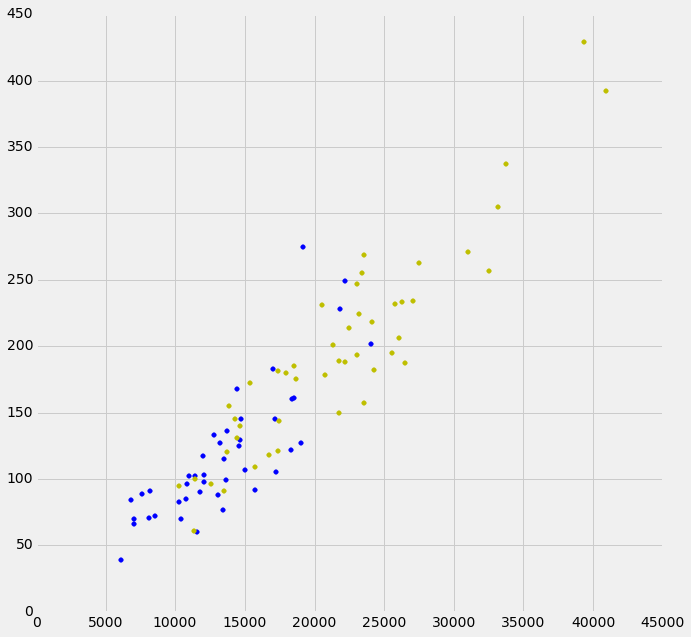

In [12]:
plots.figure(figsize=(10,10))
plots.scatter([len(s) for s in huck_finn_chapters], np.char.count(huck_finn_chapters, '.'), color='b')
plots.scatter([len(s) for s in little_women_chapters], np.char.count(little_women_chapters, '.'), color='y')

The plot shows us that many but not all of the chapters of *Little Women* are longer than those of *Huckleberry Finn*, as we had observed by just looking at the numbers. But it also shows us something more. Notice how the blue points are roughly clustered around a straight line, as are the yellow points. Moreover, it looks as though both colors of points might be clustered around the *same* straight line.

Indeed, a "rough and ready" conclusion from looking at the plot would be that on average both books tend to have somewhere between 100 and 150 characters between periods. Thus their sentence lengths might be comparable even though the chapter lengths are not. We will revisit this example later in the course to see if this rough conclusion is justified. In the meanwhile, you might want to think about whether the two great 19th century novels of our example were signaling something so very familiar us now: the 140-character limit of Twitter.